# 3 신경망

In [1]:
# 공통영역
import numpy as np
import matplotlib.pylab as plt
import sys, os
import pickle

### 3.2.2 계단 함수 구현

In [2]:
def step_function(x):
#     if > 0:
#         return 1
#     else:
#         return 0
# 위에 있는건 안쓰고 아래있는거로 씀
    y = x > 0
    return y.astype(np.int)

### 3.2.3 계단 함수 그래프

In [3]:
def step_function(x):
    return np.array(x > 0)

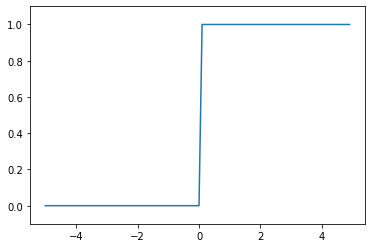

In [4]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.4 시그모이드 함수 구현

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [6]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [7]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [8]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

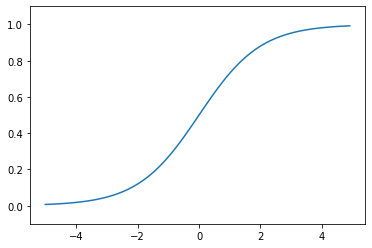

In [9]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

### 3.2.7 ReLU 함수
- 입력이 0을 넘으면 입력을 그대로 출력하고 0이하면 0을 출력하는 함수

In [10]:
def relu(x):
    return np.maximum(0, x)

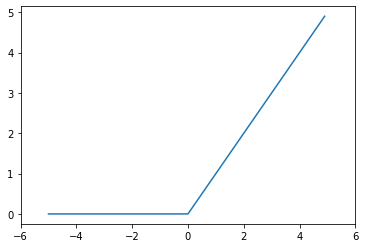

In [11]:
x = np.arange(-5, 5, 0.1)
y = relu(x)
plt.plot(x, y)
plt.xlim(-6, 6)
plt.show()

## 3.3 다차원 배열의 계산
- A(x1, y1) * B(x2, y2)를 곱할때는 y1과 x2의 값이 같아야함
- ex)
    - [[1,2], [3,4], [5,6]] * [1,2] = A(3 x 2) B(2,)
    - [[1,2,3], [4,5,6]] * [[1,2], [3,4], [5,6]]  = A(2 x 3) B(3, 2)

In [ ]:
A = 

### 3.3.3 신경망에서의 행렬 곱

In [12]:
x = np.array([1, 2])
x.shape

(2,)

In [13]:
w = np.array([[1,3,5], [2,4,6]])
print(w)
w.shape

[[1 3 5]
 [2 4 6]]


(2, 3)

In [14]:
y = np.dot(x, w)
print(y)

[ 5 11 17]


## 3.4 3층 신경망 구현하기

In [15]:
x = np.array([1.0, 0.5])
w1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
b1 = np.array([0.1, 0.2, 0.3])

print(x.shape)
print(w1.shape)
print(b1.shape)

(2,)
(2, 3)
(3,)


In [16]:
a1 = np.dot(x, w1) + b1

In [17]:
z1 = sigmoid(a1)

In [18]:
print(a1)
print(z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [19]:
w2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
b2 = np.array([0.1, 0.2])

print(z1.shape)
print(w2.shape)
print(b2.shape)

(3,)
(3, 2)
(2,)


In [20]:
a2 = np.dot(z1, w2) + b2

In [21]:
z2 = sigmoid(a2)

In [22]:
def identity_function(x):
    return x

w3 = np.array([[0.1, 0.3], [0.2, 0.4]])
b3 = np.array([0.1, 0.2])

a3 =np.dot(z2, w3) + b3
y = identity_function(a3)

In [23]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
   
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)   

[0.31682708 0.69627909]


## 3.5 출력층 설계하기
- 신경망은 분류와 회귀 모두에 이용 가능함
- [회귀(regression)]의 경우 __항등함수__를 [분류(classification)]의 경우 __소프트맥스__를 사용함

### 소프트 맥스 함수

- 출력이 0에서 1.0 사이의 실수값임

In [24]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

## 손글씨 숫자 인식

In [25]:
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from PIL import Image

In [26]:
(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

In [27]:
# 각 데이터의 형상 출력
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [28]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    display(pil_img)
    #pil_img.show()

In [29]:
temp = np.random.randint(10000)
print(temp)

8242


In [30]:
img = x_train[temp]
label = t_train[temp]
print(label)
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

8
(784,)
(28, 28)


In [31]:
img_show(img)

### 손글씨 추론 처리
- 입력층이 784인 이유는 28*28이기 때문이고 출력층이 10인 이유는 0~9를 구분하기 때문

In [32]:
def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

In [33]:
def init_network():
    with open("dataset/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

In [34]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [35]:
x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [36]:
W1, W2, W3 = network['W1'], network['W2'], network['W3']
print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


In [37]:
x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [38]:
list(range(0, 10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [39]:
list(range(0, 10, 3))

[0, 3, 6, 9]